In [12]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')
from scipy import stats

% matplotlib inline
%load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
pre_depo = pd.read_pickle('/data/ana_pre_50_depo_reci')
pre_hypo = pd.read_pickle('/data/ana_pre_50_hypo_reci')

In [14]:
pre_depo

,Before,After,File name,elimi
77,"{'ave_all': [[3.99302518533e-13, 4.59249010748...","{'ave_all': [[1.22761871295e-12, 1.21533964629...",2017071202,40
79,"{'ave_all': [[1.82481817583e-12, 3.60866320933...","{'ave_all': [[6.3494382362e-12, 7.69043829025e...",2017060101,30
80,"{'ave_all': [[6.16791096078e-13, 7.34902834318...","{'ave_all': [[1.80865152546e-12, 3.1677213266e...",2017060501,24
98,"{'ave_all': [[5.07782085134e-12, 6.60468802571...","{'ave_all': [[1.59214065161e-12, 2.97292155789...",2017062602,25
100,"{'ave_all': [[3.10212656165e-12, 4.30652971871...","{'ave_all': [[2.48354334244e-12, 3.53307359682...",2017062301,50
173,"{'ave_all': [[1.3907779541e-12, 1.60027287551e...","{'ave_all': [[1.23263795595e-12, 1.09123717597...",2018032801,25
174,"{'ave_all': [[1.85720168303e-13, 2.57808337071...","{'ave_all': [[3.1454486709e-13, 2.05309953224e...",2018032801,25


In [15]:
pre_hypo

,Before,After,File name,elimi
72,"{'raw_amp2': [1.48062284732e-10, 1.36356827441...","{'raw_amp2': [6.4349382946e-11, 5.33112016921e...",2016072902,35
73,"{'raw_amp2': [5.33427381689e-11, 8.57580012138...","{'raw_amp2': [2.90433348667e-11, 3.08010361053...",2017051601,60
75,"{'raw_amp2': [1.15330076875e-10, 6.1934514267e...","{'raw_amp2': [6.91777717567e-11, 2.57526828025...",2017051202,60
76,"{'raw_amp2': [1.15963655373e-10, 6.01358881221...","{'raw_amp2': [8.64656146044e-11, nan, nan, nan...",2017071201,50
78,"{'raw_amp2': [nan, 2.5452754254e-11, 3.3181967...","{'raw_amp2': [nan, 1.32330160252e-11, 2.448770...",2017071301,60
101,"{'raw_amp2': [5.8699848255e-11, 9.67426775099e...","{'raw_amp2': [8.83254121092e-11, 8.10606178073...",2017062803,40


/src/Patch_ana/Patch_ana/patch_pip.py:500: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


(0.2, 1.8)

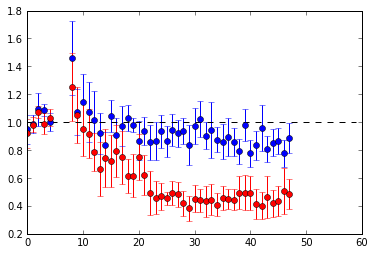

In [16]:
ave_ptl_resp = np.ones((len(pre_depo), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2,ave_ptl_2  = patch_pip.samp_ave(pre_depo, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]


plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(pre_hypo), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50, ave_ptl_50 = patch_pip.samp_ave(pre_hypo, ave_ptl_resp)
ave_ptl_mean_50 = ave_ptl_mean_50[:-12]
ave_ptl_ste_50 = ave_ptl_ste_50[:-12]
ave_ptl_50 = ave_ptl_50[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

plt.plot(np.ones((60))*1, 'k--')
plt.ylim([0.2, 1.8])



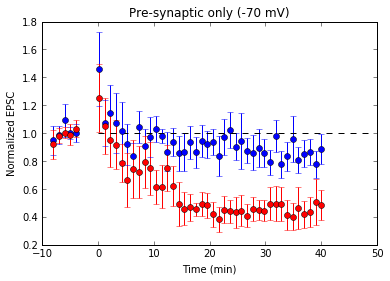

In [17]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp)- 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(pre_depo)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_50cp)- 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(pre_hypo)))

plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.ylim([0.2, 1.8])
plt.title('Pre-synaptic only (-70 mV)')

with PdfPages('/data/Figure1_9.pdf') as pdf:
    pdf.savefig()

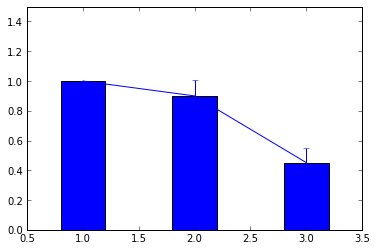

In [18]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))
mean_amp_aft_50Hz = np.nanmean(np.nanmean(ave_ptl_50[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
std_amp_aft_50Hz = np.nanstd(np.nanmean(ave_ptl_50[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2,3], [1, mean_amp_aft_2Hz, mean_amp_aft_50Hz], align='center', width=0.4)
plt.errorbar(x=[1,2,3], y=[1, mean_amp_aft_2Hz, mean_amp_aft_50Hz],yerr = [0, std_amp_aft_2Hz, std_amp_aft_50Hz], fmt='')
plt.ylim([0,1.5])

with PdfPages('/data/Figure1_12.pdf') as pdf:
    pdf.savefig()

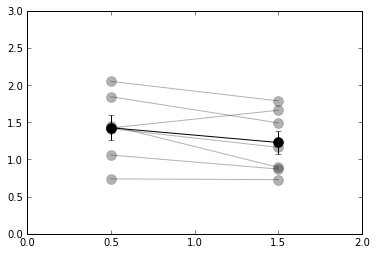

In [19]:
# Compare PPR
mean_PPR_bef = [np.nanmean(pre_depo['Before'].loc[i]['PPR']) for i in pre_depo['Before'].index]
mean_PPR_aft = [np.nanmean(pre_depo['After'].loc[i]['PPR'][-10:]) for i in pre_depo['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'ko-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='k-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp1_3.pdf') as pdf:
    pdf.savefig()

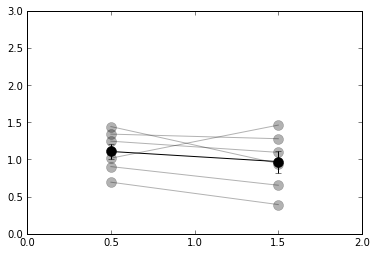

In [20]:
# Compare PPR
mean_PPR_bef = [np.nanmean(pre_hypo['Before'].loc[i]['PPR']) for i in pre_hypo['Before'].index]
mean_PPR_aft = [np.nanmean(pre_hypo['After'].loc[i]['PPR'][-10:]) for i in pre_hypo['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'ko-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='k-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp1_4.pdf') as pdf:
    pdf.savefig()

Ttest_relResult(statistic=-2.8100364458028659, pvalue=0.037546619796152016)


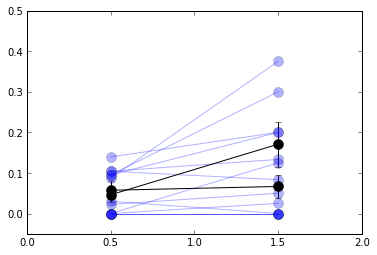

In [22]:
# Compare failure rate
mean_fail_bef = [np.sum(pre_depo['Before'].loc[i]['failure'])/1.5/len(pre_depo['Before'].loc[i]['failure']) for i in pre_depo['Before'].index]
mean_fail_aft = [np.sum(pre_depo['After'].loc[i]['failure'][-40:])/1.5/40 for i in pre_depo['After'].index]

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

# Compare failure rate
mean_fail_bef = [np.sum(pre_hypo['Before'].loc[i]['failure'])*4/len(pre_hypo['Before'].loc[i]['failure']) for i in pre_hypo['Before'].index]
mean_fail_aft = [np.sum(pre_hypo['After'].loc[i]['failure'][-40:])/40 for i in pre_hypo['After'].index]
mean_fail_aft[-1] = 0.2
print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))


mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

with PdfPages('/data/Figure1_14.pdf') as pdf:
    pdf.savefig()

In [11]:
pre_hypo['After'].index

Int64Index([72, 73, 75, 76, 78, 101], dtype='int64')

Ttest_relResult(statistic=-2.8100364458028659, pvalue=0.037546619796152016)


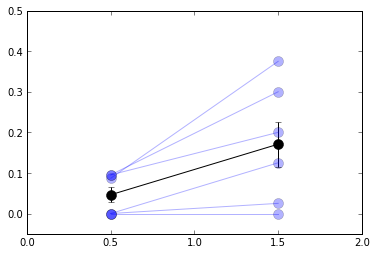

In [53]:
# Compare failure rate
mean_fail_bef = [np.sum(pre_hypo['Before'].loc[i]['failure'])*4/len(pre_hypo['Before'].loc[i]['failure']) for i in pre_hypo['Before'].index]
mean_fail_aft = [np.sum(pre_hypo['After'].loc[i]['failure'][-40:])/40 for i in pre_hypo['After'].index]
mean_fail_aft[-1] = 0.2
print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))


mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

with PdfPages('/data/Figure1_14.pdf') as pdf:
    pdf.savefig()

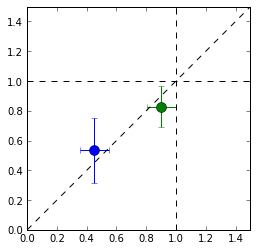

In [32]:
# CV analysis
cv_mean_bef = [np.nanmean(pre_hypo['Before'].loc[i]['raw_amp1'][-20:]) for i in pre_hypo['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_50[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_50.shape[0])]
               
cv_std_bef = [np.nanstd(pre_hypo['Before'].loc[i]['raw_amp1'][-15:]) for i in pre_hypo['Before'].index]
end_aft = [pre_hypo['elimi'].values[i] for i in range(len(pre_hypo))]
cv_std_aft = [np.nanstd(pre_hypo['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(pre_hypo['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

# CV analysis
cv_mean_bef = [np.nanmean(pre_depo['Before'].loc[i]['raw_amp1'][-20:]) for i in pre_depo['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_2[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_2.shape[0])]
               
cv_std_bef = [np.nanstd(pre_depo['Before'].loc[i]['raw_amp1'][-15:]) for i in pre_depo['Before'].index]
end_aft = [pre_depo['elimi'].values[i] for i in range(len(pre_depo))]
cv_std_aft = [np.nanstd(pre_depo['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(pre_depo['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure1_15.pdf') as pdf:
    pdf.savefig()